In [92]:
from surprise import SVD,BaselineOnly,KNNBasic, accuracy
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt_item


#file_path = os.path.expanduser('D:/UCF/ML/Homework/Homework5/archive/ratings.csv')
dataset = pd.read_csv('ratings_small.csv')

dataset.shape

dataset.drop(dataset.columns[3], axis=1,inplace=True)
print(dataset.shape)

# dataframe_train = pd.DataFrame(dataset.data, columns=dataset.feature_name)
# dataframe_train.head

reader = Reader(line_format='user item rating',sep=',',skip_lines=1)
data = Dataset.load_from_df(dataset, reader=reader)

#data = data.train_test_split(data, test_size=0.2)
#trainsetfull = data.build_full_trainset()



(100004, 3)


In [98]:
temp_array=[]


simoption_dict_Item = {
    'user_based':False
}
Item_KNNBasic = KNNBasic(sim_options=simoption_dict_Item)

simoption_dict_User = {
  'user_based':True
}
User_KNNBasic = KNNBasic(sim_options=simoption_dict_User)


algo_PMF = SVD(biased=False)
algo_Userbased = User_KNNBasic
alg_Itembased = Item_KNNBasic

result_PMF = cross_validate(algo_PMF,data, measures=['RMSE','MAE'], cv=5, verbose=True)
result_Userbased = cross_validate(algo_Userbased,data, measures=['RMSE','MAE'], cv=5, verbose=True)
result_ItemBased = cross_validate(alg_Itembased,data, measures=['RMSE','MAE'], cv=5, verbose=True)

print("\n The average performace for PMF using MAE is: -->" + str(np.mean(result_PMF["test_mae"])))
print("\n The average performace for PMF using RMSE is: -->" + str(np.mean(result_PMF["test_rmse"])))

print("\n The average performace for User Based CF using MAE is: -->" + str(np.mean(result_Userbased["test_mae"])))
print("\n The average performace for User Based CF using RMSE is: -->" + str(np.mean(result_Userbased["test_rmse"])))

print("\n The average performace for Item Based CF using MAE is: -->" + str(np.mean(result_ItemBased["test_mae"])))
print("\n The average performace for Item Based CF using RMSE is: -->" + str(np.mean(result_ItemBased["test_rmse"])))

# for algorithm in [SVD(),Item_KNNBasic,User_KNNBasic]:
#     results = cross_validate(algorithm,data, measures=['RMSE','MAE'], cv=5, verbose=True)
#     tmp = pd.DataFrame.from_dict(results).mean(axis=0)
#     tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]],index=['Algorithm']))
#     temp_array.append(tmp)

# print (results)

#pd.DataFrame(temp_array).set_index('Algorithm').sort_values('test_rmse')

# algo = SVD()

# cross_validate(algo,data, measures=['RMSE','MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0058  1.0154  1.0031  1.0059  1.0082  1.0077  0.0042  
MAE (testset)     0.7746  0.7841  0.7734  0.7756  0.7761  0.7768  0.0038  
Fit time          3.57    3.50    3.47    3.60    3.67    3.56    0.07    
Test time         0.08    0.54    0.08    0.08    0.08    0.17    0.18    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9561  0.9711  0.9682  0.9667  0.9757  0.9676  0.0065

Starting with item based with cosine similarity
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Starting with item based with MSD similarity
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Starting with item based with Pearson similarity
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matr

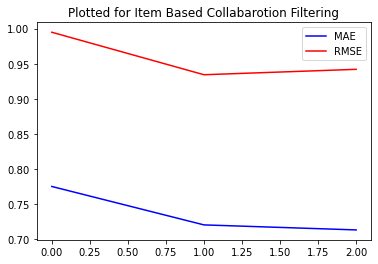

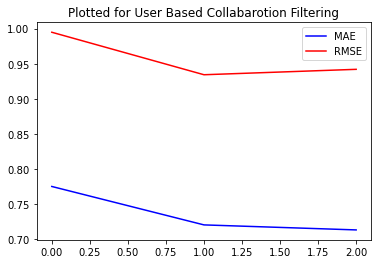

In [94]:
simoption_dict_cosine = {
    'name':'cosine'
    ,'user_based':False
}
Item_KNNBasic_Cosine = KNNBasic(sim_options=simoption_dict_cosine)
print('Starting with item based with cosine similarity')
results_item_cosine = cross_validate(Item_KNNBasic_Cosine,data, measures=['RMSE','MAE'], cv=5, verbose=False)

simoption_dict_MSD = {
    'name':'MSD'
    ,'user_based':False
}
Item_KNNBasic_MSD = KNNBasic(sim_options=simoption_dict_MSD)
print('Starting with item based with MSD similarity')
results_item_MSD = cross_validate(Item_KNNBasic_MSD,data, measures=['RMSE','MAE'], cv=5, verbose=False)


simoption_dict_Pearson = {
    'name':'pearson_baseline'
    ,'user_based':False
}
Item_KNNBasic_Pearson = KNNBasic(sim_options=simoption_dict_Pearson)
print('Starting with item based with Pearson similarity')
results_item_Pearson = cross_validate(Item_KNNBasic_Pearson,data, measures=['RMSE','MAE'], cv=5, verbose=False)


User_simoption_cosine = {
    'name':'cosine'
    ,'user_based':True
}
User_KNNBasic_cosine = KNNBasic(sim_options=User_simoption_cosine)
print('Starting with user based with Cosine similarity')
results_user_cosine = cross_validate(User_KNNBasic_cosine,data, measures=['RMSE','MAE'], cv=5, verbose=False)

User_simoption_MSD = {
    'name':'MSD'
    ,'user_based':True
}
User_KNNBasic_MSD = KNNBasic(sim_options=User_simoption_MSD)
print('Starting with user based with MSD similarity')
results_user_MSD = cross_validate(User_KNNBasic_MSD,data, measures=['RMSE','MAE'], cv=5, verbose=False)

User_simoption_Pearson = {
    'name':'pearson_baseline'
    ,'user_based':True
}
User_KNNBasic_Pearson = KNNBasic(sim_options=User_simoption_Pearson)
print('Starting with user based with Pearson similarity')
results_user_Pearson = cross_validate(User_KNNBasic_Pearson,data, measures=['RMSE','MAE'], cv=5, verbose=False)

x=[0,1,2]

item_yaxis_mae = [np.mean(results_item_cosine["test_mae"]),np.mean(results_item_MSD["test_mae"]),np.mean(results_item_Pearson["test_mae"])]
item_yaxis_rmse = [np.mean(results_item_cosine["test_rmse"]),np.mean(results_item_MSD["test_rmse"]),np.mean(results_item_Pearson["test_rmse"])]

plt.plot(x,item_yaxis_mae,"-b",label="MAE")
plt.plot(x,item_yaxis_rmse,"-r",label="RMSE")
plt.legend(('MAE','RMSE'),loc="upper right")
plt.title("Plotted for Item Based Collabarotion Filtering")
plt.show()


user_yaxis_mae = [np.mean(results_user_cosine["test_mae"]),np.mean(results_user_MSD["test_mae"]),np.mean(results_user_Pearson["test_mae"])]
user_yaxis_rmse = [np.mean(results_user_cosine["test_rmse"]),np.mean(results_user_MSD["test_rmse"]),np.mean(results_user_Pearson["test_rmse"])]

plt_item.plot(x,item_yaxis_mae,"-b",label="MAE")
plt_item.plot(x,item_yaxis_rmse,"-r",label="RMSE")
plt_item.legend(('MAE','RMSE'),loc="upper right")
plt_item.title("Plotted for User Based Collabarotion Filtering")
plt_item.show()



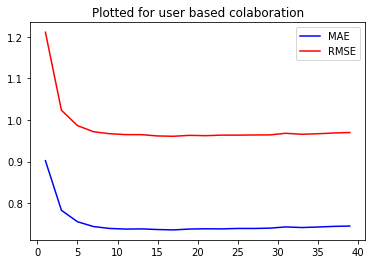

 
 The best value of K for user based collaboration filtering is --> 9 and the value for Kth index is :--> 0.9608605475024763


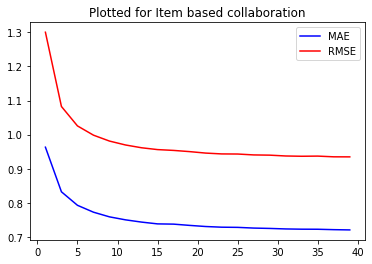

 
 The best value of K for item based collaboration filtering is --> 20 and the value for Kth index is :--> 0.9348379539138663


In [95]:
# For best K in KNN

Itembased_dict_MSD = {
    'name':'MSD'
    ,'user_based':False
}


Userbased_dict_MSD = {
    'name':'MSD'
    ,'user_based':True
}
# User_KNNBasic_MSD = KNNBasic(sim_options=Userbased_dict_MSD)

Value_of_K = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39]
arr_MAE = []
arr_RMSE = []

for KVal in Value_of_K:
    #print('\n Started for value of K ==> ' + str(KVal))
    
    User_KNNBasic_MSD = KNNBasic(min_k=1,k=KVal,sim_options=Userbased_dict_MSD,verbose=False)
    user_results = cross_validate(User_KNNBasic_MSD,data, measures=['RMSE','MAE'], cv=5, verbose=False)
    #print("\n for k ==> "+str(KVal) + " -->"+ str(np.mean(user_results["test_mae"])))
    #print("\n for k ==> "+str(KVal) + " -->"+ str(np.mean(user_results["test_rmse"])))


    arr_MAE.append(np.mean(user_results["test_mae"]))
    arr_RMSE.append(np.mean(user_results["test_rmse"]))
    user_results = {}
    #arr_RMSE.append(results["RMSE (testset)"]["Mean"])
    
plt.plot(Value_of_K,arr_MAE,"-b",label="MAE")
plt.plot(Value_of_K,arr_RMSE,"-r",label="RMSE")
plt.legend(('MAE','RMSE'),loc="upper right")
plt.title("Plotted for user based colaboration")
plt.show()


print(" \n The best value of K for user based collaboration filtering is --> " + str(arr_RMSE.index(min(arr_RMSE))+1) + " and the value for Kth index is :--> " + str(min(arr_RMSE)))

item_arr_MAE = []
item_arr_RMSE = []
for KVal in Value_of_K:
    #print('\n Started for value of K ==> ' + str(KVal))

    Item_KNNBasic_MSD = KNNBasic(min_k=1,k=KVal,sim_options=Itembased_dict_MSD,verbose=False)
    item_results = cross_validate(Item_KNNBasic_MSD,data, measures=['RMSE','MAE'], cv=5, verbose=False)

    #print("\n for k ==> "+str(KVal) + " -->"+ str(np.mean(user_results["test_mae"])))
    #print("\n for k ==> "+str(KVal) + " -->"+ str(np.mean(user_results["test_rmse"])))


    item_arr_MAE.append(np.mean(item_results["test_mae"]))
    item_arr_RMSE.append(np.mean(item_results["test_rmse"]))
    item_results = {}

plt_item.plot(Value_of_K,item_arr_MAE,"-b",label="MAE")
plt_item.plot(Value_of_K,item_arr_RMSE,"-r",label="RMSE")
plt_item.legend(('MAE','RMSE'),loc="upper right")
plt_item.title("Plotted for Item based collaboration")
plt_item.show()

#print(" \n The best value of K for item based collaboration filtering is --> " + str(arr_RMSE.index(min(arr_RMSE))+1))
print(" \n The best value of K for item based collaboration filtering is --> " + str(item_arr_RMSE.index(min(item_arr_RMSE))+1) + " and the value for Kth index is :--> " + str(min(item_arr_RMSE)))


